# CIS as a Python Library

## Reading data is really easy

As a Python package CIS can easily be used in your own scripts:

In [2]:
from cis import read_data, read_data_list

Here we're using it inside an iPython notebook, but this is exactly the same as using it in a script or other Python interpreter.

In [4]:
data_path = "/Users/watson-parris/Stockholm_workshop/WorkshopData2016/ARCPAC_2008/*.nc"

NC = read_data(data_path, "NUMBER_CONCENTRATION")

# Note we can also use from cis.data_io.products.AProduct import get_variables to find the variables in a file.

We can easily print a summary of the data:

In [5]:
print NC   # Note the warning below

Ungridded data: NUMBER_CONCENTRATION / (#/cm3) 
     Shape = (1268,)

     Total number of points = 1268
     Number of non-masked points = 981
     Long name = 
     Standard name = None
     Units = #/cm3
     Missing value = -9999
     Range = (17.0, 2191.0)
     History = 
     Coordinates: 
       time
          Long name = 
          Standard name = time
          Units = days since 1600-01-01 00:00:00
          Calendar = gregorian
          Missing value = -9999
          Range = ('2008-04-11 20:01:30.000001', '2008-04-16 03:03:30')
          History = 
       latitude
          Long name = 
          Standard name = latitude
          Units = degrees
          Missing value = -9999
          Range = (63.303199999999997, 75.128600000000006)
          History = 
       longitude
          Long name = 
          Standard name = longitude
          Units = degrees
          Missing value = -9999
          Range = (-165.1241, -139.23159999999999)
          History = 
       altitud

Let's take a look at the methods available on the data:

In [7]:
print NC.lat

We can also access the data directly:

In [11]:
print NC.data
print NC.data**2

[2191.0 581.0 306.0 ..., 221.0 220.0 187.0]
[4800481.0 337561.0 93636.0 ..., 48841.0 48400.0 34969.0]


And the coordinates:

In [9]:
for c in NC.coords():
    print c.name(), c.data
print NC.coord('time').units

time [ 149120.834375    149120.83506944  149120.83576389 ...,  149125.12604167
  149125.12673611  149125.12743056]
latitude [ 64.8029  64.7594  64.7385 ...,  64.8948  64.8635  64.8336]
longitude [-147.8828 -147.9471 -148.0415 ..., -147.7128 -147.7722 -147.8285]
altitude [  233.4   652.9  1099.1 ...,   682.1   435.8   203.5]
air_pressure [ 989.79  937.43  884.56 ...,  924.03  954.14  983.3 ]
days since 1600-01-01 00:00:00


**Note** in the above that one of the calls is to a method, and the other is to a data attribute. See the help output above.

We can also look at the metadata:

In [10]:
print NC.metadata

     Long name = 
     Standard name = None
     Units = #/cm3
     Missing value = -9999
     Range = (17.0, 2191.0)
     History = 



Or edit it:

In [11]:
NC.metadata.history += 'DWP removed the zero-values\n'
print NC.metadata  

     Long name = 
     Standard name = None
     Units = #/cm3
     Missing value = -9999
     Range = (17.0, 2191.0)
     History = DWP removed the zero-values




Note the `\n` above - this is a line break, and ensures that when we add another line to the history the lines won't run into each other.

## Using Pandas with CIS data

Now that we have the data in Python we can use any Python library to work with it. 

We've shown how to access the data in Numpy arrays, but it's also easy to read data into Pandas.

Pandas (http://pandas.pydata.org) is a free, open-source library for data analysis and offers powerful tools similar to R. 

It's particularly good for working with time series.

We can easily convert CIS data into pandas data to take advantage of this time-series functionality:

In [12]:
df = NC.as_data_frame()

In [13]:
df

,air_pressure,altitude,latitude,longitude,NUMBER_CONCENTRATION
2008-04-11 20:01:30.000001,989.79,233.4,64.8029,-147.8828,2191.0
2008-04-11 20:02:30.000000,937.43,652.9,64.7594,-147.9471,581.0
2008-04-11 20:03:30.000000,884.56,1099.1,64.7385,-148.0415,306.0
2008-04-11 20:04:30.000000,839.03,1496.7,64.7820,-148.1129,281.0
2008-04-11 20:05:30.000000,797.26,1877.5,64.8434,-148.1207,246.0
2008-04-11 20:06:30.000000,758.63,2245.8,64.9073,-148.1275,230.0
2008-04-11 20:07:30.000000,719.23,2638.7,64.9720,-148.1360,241.0
2008-04-11 20:08:30.000016,683.18,3013.7,65.0354,-148.1538,197.0
2008-04-11 20:09:30.000012,658.75,3275.1,65.1007,-148.1691,209.0
2008-04-11 20:10:30.000009,646.21,3411.1,65.1700,-148.1806,194.0


Now we can do cool Pandas stuff!

In [14]:
df.mean()

air_pressure             729.390544
altitude                2671.365300
latitude                  68.334602
longitude               -151.828151
NUMBER_CONCENTRATION     314.305810
dtype: float64

In [15]:
df['NUMBER_CONCENTRATION'].max() 

2191.0

In [16]:
df.ix[df['NUMBER_CONCENTRATION'].argmin()]

air_pressure             686.5500
altitude                2916.1000
latitude                  73.2817
longitude               -153.3266
NUMBER_CONCENTRATION      17.0000
Name: 2008-04-12 23:49:30, dtype: float64

In [17]:
df.resample('5min', how='mean')

/Users/watson-parris/anaconda/envs/cis_test/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  if __name__ == '__main__':


,air_pressure,altitude,latitude,longitude,NUMBER_CONCENTRATION
2008-04-11 20:00:00,912.7025,870.525,64.77070,-147.996075,839.750000
2008-04-11 20:05:00,723.4100,2610.160,64.97176,-148.141420,224.600000
2008-04-11 20:10:00,646.2260,3411.580,65.31194,-148.192380,185.200000
2008-04-11 20:15:00,646.3900,3409.580,65.66350,-148.235960,170.600000
2008-04-11 20:20:00,646.5040,3406.460,66.01632,-148.284860,286.000000
2008-04-11 20:25:00,646.6240,3404.320,66.37504,-148.330820,242.000000
2008-04-11 20:30:00,646.7440,3403.640,66.73098,-148.379880,148.800000
2008-04-11 20:35:00,646.7860,3402.740,67.09088,-148.422520,151.400000
2008-04-11 20:40:00,646.8900,3400.620,67.45660,-148.472620,173.800000
2008-04-11 20:45:00,646.9100,3397.700,67.82766,-148.519480,169.000000


# And more plot types

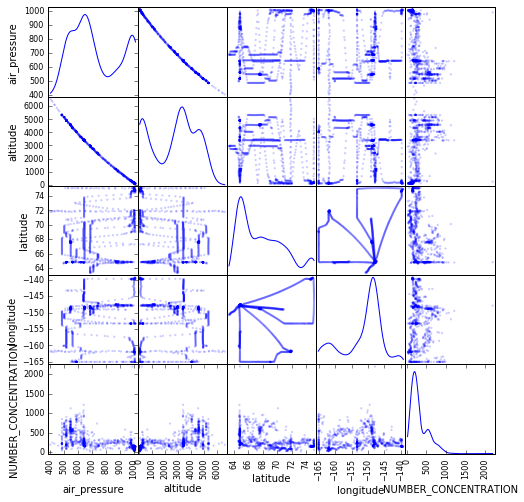

In [18]:
%matplotlib inline

from pandas.tools.plotting import scatter_matrix
m = scatter_matrix(df, alpha=0.2, figsize=(8, 8), diagonal='kde', edgecolors='none')

## Accessing CIS functionality - BETA

### Plotting

We can also use the built in plotting routines (although they need a bit of tidying up):

In [ ]:
from cis.plotting.plot import Plotter
%matplotlib inline

Plotter([NC],x_variable='longitude',y_variable='latitude',plotwidth=18,plotheight=12,cbarscale=0.5,datagroups=[{'itemstyle':'', 'cmap':'jet', 'edgecolor':''}])